<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW2_GD_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 2: Градиентный спуск (pro)**

В этом задании две части - теоретическая и практическая. Теорию можно набирать, используя LaTex или просто решать на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за домашнее задание - 10.

## Часть 1 (теоретическая)

## Задание 1 (**1.5 балла**)

В случае одномерной Ridge-регрессии минимизируется функция со штрафом:
$$Q(w) = (y-xw)^T(y-xw)+\lambda w^2,$$
где $\lambda$ - положительный параметр, штрафующий функцию за слишком большие значения $w$.

1)  (**0.5 балла**) Найдите производную $\nabla_w Q(w)$, выведите формулу для оптимального $w$.

2) (**0.5 балла**) Найдите вторую производную $\nabla^2_w Q(w)$. Убедитесь, что мы оказались в точке минимума.

3) (**0.5 балла**) Выпишите шаг градиентного спуска в матричном виде.

1. Производная $\nabla_w Q(w)$:
    $$Q(w) = (y^T - w x^T)(y - xw) + \lambda w^2 = y^T y - 2 w x^T y + w^2 x^T x + \lambda w^2$$
    $$\nabla_w Q(w) = -2x^T y + 2w x^T x + 2\lambda w$$
Оптимальное значение $w$:
    $$-2x^T y + 2w(x^T x + \lambda) = 0$$
    $$w = \frac{x^T y}{x^T x + \lambda}$$
2. Вторая производная $\nabla^2_w Q(w)$:
    $$\nabla_w Q(w) = -2x^T y + 2w(x^T x + \lambda)$$
    $$\nabla^2_w Q(w) = 2(x^T x + \lambda)$$
Так как $\lambda > 0 => x^T x + \lambda > 0$, вторая производная положительна => $w$ находится в точке минимума.
3. Шаг градиентного спуска:
    $$w^{(k+1)} = w^{(k)} - \eta \nabla_w Q(w^{(k)})$$
    $$w^{(k+1)} = w^{(k)} - \eta \left(-2x^T y + 2w^{(k)}(x^T x + \lambda)\right)$$
    $$w^{(k+1)} = w^{(k)} + 2\eta x^T y - 2\eta w^{(k)} (x^T x + \lambda)$$
    $$w^{(k+1)} = w^{(k)} (1 - 2\eta (x^T x + \lambda)) + 2\eta x^T y$$


## Часть 2 (практическая).

## Задание 2 (**1 балл**)

Дана функция: $$f(x) = x\cdot sin(5x) + 0.1 \cdot x^2$$

Для этой функции:

- [ ] Реализуйте (или возьмите рассмотренный на занятии) метод градиетного спуска с условием остановки `stop=1e^-6` и шагом `eta=0.001`. **Градиетный спуск обязательно должен сохранять траекторию движения.**
- [ ] Задайте стартовые точки x0, равные 0, 0.5, 1
- [ ] Реализуйте нахождение точек минимума и максимума функции $f(x)$ (для нахождения максимума нам нужно в направлении градиента, а не антиградиента)
- [ ] Проанализируйте результаты. Предположите, с чем они связаны. Ответьте на вопросы:
    - Чему равны значения экстремумов?
    - При старте из какой начальной точки найденные экстремумы совпадут?




In [3]:
import numpy as np

# Функция и её производная
def f(x):
    return x * np.sin(5 * x) + 0.1 * x**2

def df(x):
    return np.sin(5 * x) + 5 * x * np.cos(5 * x) + 0.2 * x

# Градиентный спуск
def gradient_descent(f, df, x0, eta, max_iter=1000, tol=1e-6):
    x = x0
    trajectory = [x]
    for _ in range(max_iter):
        x_next = x - eta * df(x)
        trajectory.append(x_next)
        if abs(x_next - x) < tol:
            break
        x = x_next
    return x, trajectory

# Поиск экстремумов
def find_points(f, df, x0, eta, max_iter=1000, tol=1e-6):
    x_min, traj_min = gradient_descent(f, df, x0, eta, max_iter, tol)
    x_max, traj_max = gradient_descent(f, df, x0, -eta, max_iter, tol)

    return (x_min, traj_min), (x_max, traj_max)

In [4]:
eta = 0.001
tol = 1e-6
x0_values = [0, 0.5, 1]

for x0 in x0_values:
    (x_min, traj_min), (x_max, traj_max) = find_points(f, df, x0, eta)
    print(f"x0 = {x0}")
    print(f"Минимум: x = {x_min:.6f}, f(x) = {f(x_min):.6f}")
    print(f"Траектория минимума: {traj_min[:5]}")
    print(f"Максимум: x = {x_max:.6f}, f(x) = {f(x_max):.6f}")
    print(f"Траектория максимума: {traj_max[:5]}")
    print()

x0 = 0
Минимум: x = 0.000000, f(x) = 0.000000
Траектория минимума: [0, np.float64(0.0)]
Максимум: x = 0.000000, f(x) = 0.000000
Траектория максимума: [0, np.float64(0.0)]

x0 = 0.5
Минимум: x = 0.975061, f(x) = -0.867075
Траектория минимума: [0.5, np.float64(0.5013043868947634), np.float64(0.50262871628548), np.float64(0.5039732826996968), np.float64(0.505338383290982)]
Максимум: x = 0.411857, f(x) = 0.380650
Траектория максимума: [0.5, np.float64(0.49869561310523663), np.float64(0.49741117753027747), np.float64(0.49614639546416095), np.float64(0.4949009721009791)]

x0 = 1
Минимум: x = 0.975138, f(x) = -0.867075
Траектория минимума: [1, np.float64(0.999340613347347), np.float64(0.9986990285873348), np.float64(0.9980747496917983), np.float64(0.9974672950734235)]
Максимум: x = 1.603529, f(x) = 1.839232
Траектория максимума: [1, np.float64(1.000659386652653), np.float64(1.0013365910510574), np.float64(1.002032110939009), np.float64(1.0027464586023058)]



При старте из x0 = 0.5 и x0 = 1 минимумы совпадают, видимо локальный минимум для обеих точек = 0.975

## Задание 3 (**0.5 балла**).
Напишите функцию, вычисляющую значение весов в линейной регрессии по точной (аналитически найденной) формуле.

In [5]:
def ols_solution(X, y):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return np.linalg.inv(X.T @ X) @ X.T @ y

## Задание 5 (**1 балл**).
Модифицируйте метод градиентного спуска с семинара так, чтобы это теперь был метод стохастического градиентного спуска.

In [6]:
# Из семинара
def compute_cost(X, y, theta):
    m = len(y)

    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

def gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X)) # добавляем к Х столбец из 1
    params = np.random.rand(X.shape[1])

    m = X.shape[0]

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - 2./m * learning_rate * (X.T @ ((X @ params) - y))
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

In [7]:
def stochastic_gradient_descent(X, y, learning_rate, iterations):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])

    m = X.shape[0]

    cost_track = np.zeros((iterations, 1))

    for i in range(iterations):
        rand_idx = np.random.randint(0, m)

        X_i = X[rand_idx:rand_idx+1]
        y_i = y[rand_idx:rand_idx+1]

        gradient = 2 * X_i.T @ ((X_i @ params) - y_i)
        params = params - learning_rate * gradient
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

## Задание 6 (**3 балла**).
* **(0 баллов)**. Скопируйте метод градиентного спуска из семинара в этот ноутбук.

* **(0.5 балла)**. Обучите линейную регрессию на данных, сгенерированных ниже, тремя методами (по точной формуле, с помощью GD и с помощью SGD) на данных для задачи регрессии (см. код). Для GD и SGD используйте learning_rate = 0.01, iterations=10000.

* **(0.5 балла)**. С помощью каждого метода сделайте предсказание (на всех данных), вычислите качество предсказания r2 (from sklearn.metrics import r2_score). Для получения предсказания можете использовать функцию predict с семинара.


Ответьте на следующие вопросы (каждый вопрос - **0.5 балла**):

1) все ли методы справились с нахождением минимума? если нет, то почему какой-то из методов не справился?

2) сравните время работы методов (используйте библиотеку time): замеряйте время работы соответствующей написанной вами функции.

3) для методов GD и SGD нарисуйте графики (для каждого свой) зависимости ошибки (loss) от номера итерации.

4) какой метод успешнее всего справился с задачей? (т.е. r2 наибольший).

In [8]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

X, y, _ = make_regression(n_samples=100000,#number of samples
                          n_features=10,#number of features
                          n_informative=8,#number of useful features
                          noise=100,#bias and standard deviation of the guassian noise
                          coef=True,#true coefficient used to generated the data
                          random_state=123)

X = pd.DataFrame(data=X, columns=np.arange(0, X.shape[1]))
X[10] = X[6] + X[7] + np.random.random()*0.01

In [9]:
from sklearn.metrics import r2_score

def predict(X, params):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X @ params

In [10]:
import time

start_time = time.time()
ols_params = ols_solution(X, y)
ols_time = time.time() - start_time

start_time = time.time()
_, gd_params = gradient_descent(X, y, learning_rate=0.01, iterations=10000)
gd_time = time.time() - start_time

start_time = time.time()
_, sgd_params = stochastic_gradient_descent(X, y, learning_rate=0.01, iterations=10000)
sgd_time = time.time() - start_time

ols_preds = predict(X, ols_params)
gd_preds = predict(X, gd_params)
sgd_preds = predict(X, sgd_params)

ols_r2 = r2_score(y, ols_preds)
gd_r2 = r2_score(y, gd_preds)
sgd_r2 = r2_score(y, sgd_preds)

print(f"OLS r2 Score: {ols_r2:.4f}")
print(f"GD r2 Score: {gd_r2:.4f}")
print(f"SGD r2 Score: {sgd_r2:.4f}")

print(f"OLS Time: {ols_time:.4f}")
print(f"GD Time: {gd_time:.4f}")
print(f"SGD Time: {sgd_time:.4f}")


OLS r2 Score: 0.7555
GD r2 Score: 0.7555
SGD r2 Score: 0.7364
OLS Time: 0.0180
GD Time: 6.1130
SGD Time: 3.0660


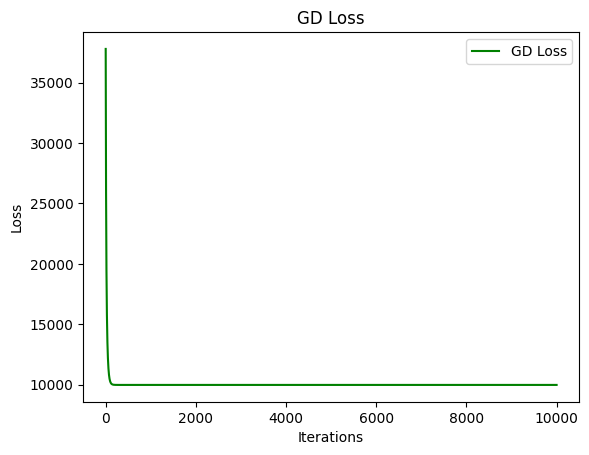

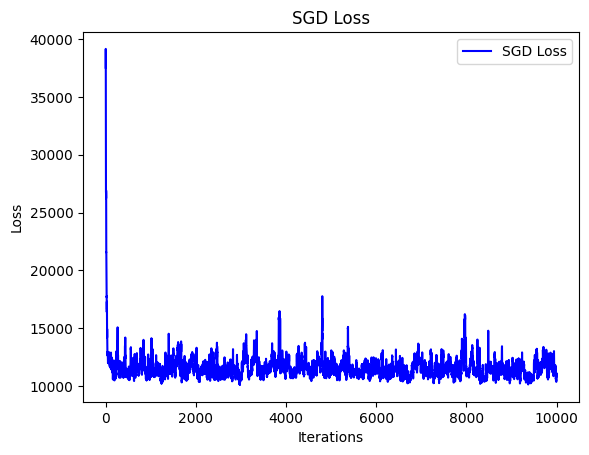

In [11]:
import matplotlib.pyplot as plt

gd_loss, _ = gradient_descent(X, y, learning_rate=0.01, iterations=10000)
sgd_loss, _ = stochastic_gradient_descent(X, y, learning_rate=0.01, iterations=10000)

plt.plot(gd_loss, label="GD Loss", color="green")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("GD Loss")
plt.legend()
plt.show()

plt.plot(sgd_loss, label="SGD Loss", color="blue")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("SGD Loss")
plt.legend()
plt.show()

1. В целом, все справились с нахождением минимума более-менее
2.  OLS Time: 0.0110
    GD Time: 6.2084
    SGD Time: 2.9720
4. Лучше всего справился обычный GD

## Задание 7 (1.5 балла).

* **(0.5 балла)**. Добавьте в функцию из задания 5 L2-регуляризацию и, соответственно, новый аргумент - коэффициент при регуляризаторе.

* **(1 балл)**. На сгенерированных выше данных обучите модифицированный алгоритм SGD с регуляризацией: в цикле перебирайте значения коэффициента регуляризации от 0.1 до 1 с шагом 0.1. Для каждого значения обучите модель и сделайте предсказание, выведите значение r2. Для какого значения коэффициента регуляризации получилось наилучшее качество r2, почему?

In [16]:
def stochastic_gradient_descent_reg(X, y, learning_rate, iterations, alpha):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])

    m = X.shape[0]

    cost_track = np.zeros((iterations, 1))

    for i in range(iterations):
        rand_idx = np.random.randint(0, m)

        X_i = X[rand_idx:rand_idx+1]
        y_i = y[rand_idx:rand_idx+1]

        gradient = 2 * X_i.T @ ((X_i @ params) - y_i) + 2 * alpha * params
        params = params - learning_rate * gradient
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

In [22]:
for alpha in np.arange(0.1, 1.1, 0.1):
    _, sgd_params = stochastic_gradient_descent_reg(X, y, learning_rate=0.01, iterations=10000, alpha=alpha)
    sgd_preds = predict(X, sgd_params)
    sgd_r2 = r2_score(y, sgd_preds)
    print(f"SGD r2 Score: {sgd_r2:.4f} with alpha: {alpha:.1f}")

SGD r2 Score: 0.7157 with alpha: 0.1
SGD r2 Score: 0.7226 with alpha: 0.2
SGD r2 Score: 0.7073 with alpha: 0.3
SGD r2 Score: 0.7121 with alpha: 0.4
SGD r2 Score: 0.6599 with alpha: 0.5
SGD r2 Score: 0.6782 with alpha: 0.6
SGD r2 Score: 0.6458 with alpha: 0.7
SGD r2 Score: 0.6373 with alpha: 0.8
SGD r2 Score: 0.5927 with alpha: 0.9
SGD r2 Score: 0.6327 with alpha: 1.0


Наилучший r2 score показал SGD с регуляризацией = 0.2, коэф-т > 0.5 видимо начинает штрафовать важные призннаки, поэтому качество сильно просело

## Задание 8 (2 балла)

Реализуйте на выбор одну из оптимизаций градиентного спуска - Momentum или  AdaGrad. Необходимые выкладки вы можете подсмотреть [здесь](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml).

In [23]:
def modified_grad_descent(X, y, learning_rate, iterations, momentum): # добавьте в аргументы также специфические для метода оптимизации гиперпараметры
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])
    velocity = np.zeros_like(params)

    m = X.shape[0]

    cost_track = np.zeros((iterations, 1))

    for i in range(iterations):
        rand_idx = np.random.randint(0, m)

        X_i = X[rand_idx:rand_idx+1]
        y_i = y[rand_idx:rand_idx+1]

        gradient = 2 * X_i.T @ ((X_i @ params) - y_i)
        velocity = momentum * velocity - learning_rate * gradient
        params += velocity
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

In [40]:
cost_track, sgd_params = modified_grad_descent(X, y, learning_rate=0.01, iterations=10000, momentum=0.09)
sgd_preds = predict(X, sgd_params)
sgd_r2 = r2_score(y, sgd_preds)
print(f"SGD r2 Score with momentum: {sgd_r2:.4f}")

SGD r2 Score with momentum: 0.7303


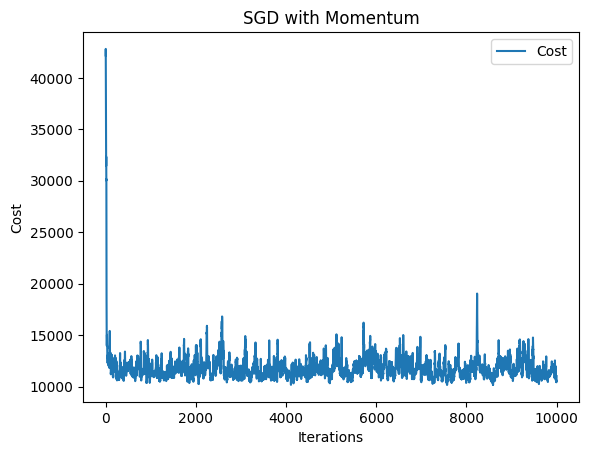

In [41]:
plt.plot(cost_track, label="Cost")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("SGD with Momentum")
plt.legend()
plt.show()

## Бонус

## Задание 9 (0.5 балла)

Существует [метод Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) (метод второго порядка) для поиска минимума функции.

Известно, что методы второго порядка точнее, чем методы первого порядка (то есть те, которые используют только первую производную для оптимизации). Как вы думаете, почему в оптимизации функций потерь все формулы используют только производные первого порядка? Почему не используют метод Ньютона?

Метод Ньютона использует матрицу вторых производных функции потерь, а так же треубет вычисления обратной матрицы, соответственно вычислительная мощность будет $O(n^3)$

## **Часть Котобонус** 🐈

Ура-ура, с вами снова кот, который может добавить вам баллы!
- 0.25, если вы угадаете, чей он
- 0.05 если просто предположите

**Подсказка:** кот одной из наших замечательных ассистенток!


[Кайфующий кот](https://ibb.co/qxjz2tp)